# Random Forest

This jupyter notebook has been made with a purpose to practice Random Forest

## Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.style.use('dark_background')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Functions

In [ ]:
def accuracy(y_real, y_pred):
  return np.sum(y_real==y_pred)/len(y_real)
def MSE(y_real, y_pred):
  return np.sum((y_real-y_pred)**2)/len(y_real)
def mean_rate_of_error(y_real, y_pred):
  return (np.abs(y_real-y_pred)/y_real).mean()
def median_rate_of_error(y_real, y_pred):
  return (np.abs(y_real-y_pred)/y_real).median()

## DF_1

In [ ]:
! gdown --id 1_vzKVkdURS7cVqAZQgVnLzV9nB6ThUvf

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1_vzKVkdURS7cVqAZQgVnLzV9nB6ThUvf
To: /content/breast-cancer.csv
100% 125k/125k [00:00<00:00, 92.3MB/s]


About this dataset

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

In [ ]:
df=pd.read_csv('/content/breast-cancer.csv')
del df['id']
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.drop('diagnosis', axis=1).describe(include='all')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df['diagnosis'].describe(include='all')

,diagnosis
count,569
unique,2
top,B
freq,357


In [ ]:
X=df.drop('diagnosis', axis=1).copy()
y=df['diagnosis'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model=RandomForestClassifier(random_state=42,
                             n_estimators=50,
                             criterion='gini',
                             max_depth=10,
                             oob_score=True,
                             warm_start=False,
                             class_weight=None,
                             n_jobs=-1)
model.fit(X_train, y_train)
print(f"accuracy for train set: {accuracy(y_train, model.predict(X_train))}")
print()
print(f"accurancy for test set: {accuracy(y_test, model.predict(X_test))}")

accuracy for train set: 1.0

accurancy for test set: 0.9649122807017544


## DF_2

In [ ]:
! gdown --id 1vUNhFCCrIkzSDS4-4SIuSyFGSXAvph70

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vUNhFCCrIkzSDS4-4SIuSyFGSXAvph70
To: /content/IRIS.csv
100% 4.62k/4.62k [00:00<00:00, 15.7MB/s]


In [ ]:
df=pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X=df.drop('species', axis=1).copy()
y=df['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model=RandomForestClassifier(random_state=42,
                             n_estimators=30,
                             max_depth=5,
                             class_weight=None,
                             warm_start=False,
                             oob_score=True)
model.fit(X_train, y_train)
print(f"accuracy for train set: {accuracy(y_train, model.predict(X_train))}")
print()
print(f"accuracy for test set: {accuracy(y_test, model.predict(X_test))}")

accuracy for train set: 1.0

accuracy for test set: 1.0


## DF_3

In [ ]:
! gdown --id 1VxW454gVfySCzvFSdr8_ZlQ0YRATo3HG
! unzip /content/housing.csv.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VxW454gVfySCzvFSdr8_ZlQ0YRATo3HG
To: /content/housing.csv.zip
100% 409k/409k [00:00<00:00, 57.1MB/s]
Archive:  /content/housing.csv.zip
  inflating: housing.csv             


In [ ]:
df=pd.read_csv('/content/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [ ]:
pd.get_dummies(df['ocean_proximity']).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [ ]:
pca=PCA()
pca.fit(StandardScaler().fit_transform(pd.get_dummies(df['ocean_proximity'])))

PCA()

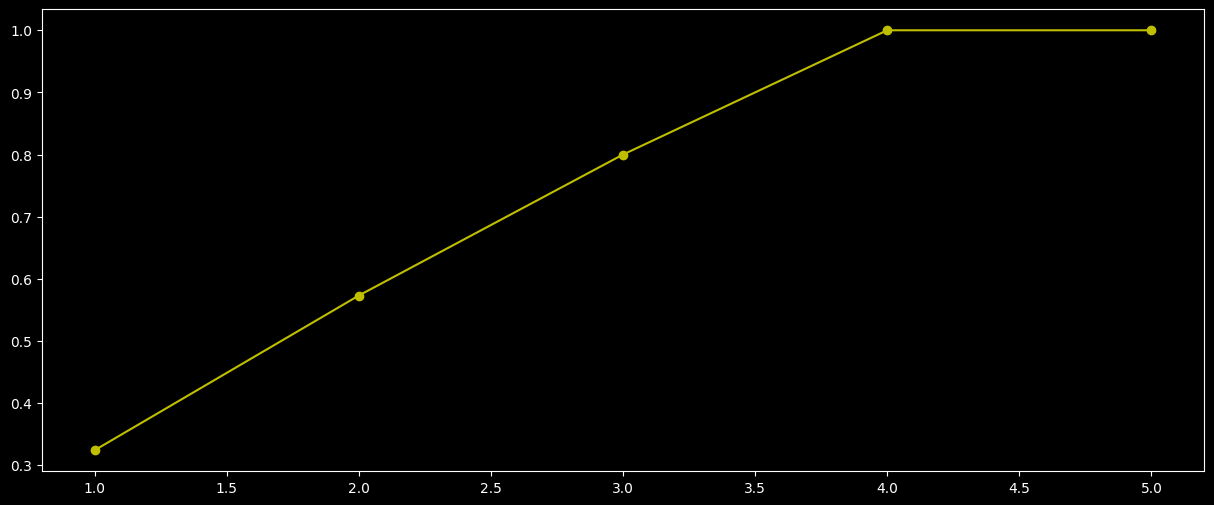

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax.plot(range(1, 1+len(pca.components_)), np.cumsum(pca.explained_variance_ratio_), color='y', marker='o')
plt.show()

In [ ]:
df[['f_1', 'f_2', 'f_3', 'f_4']]=PCA(n_components=4).fit_transform(StandardScaler().fit_transform(pd.get_dummies(df['ocean_proximity'])))

In [ ]:
df=df.drop('ocean_proximity', axis=1)

In [ ]:
X=df.drop('median_house_value', axis=1).copy()
y=df['median_house_value'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model=RandomForestRegressor(random_state=42,
                            n_estimators=100,
                            max_depth=50,
                            min_samples_split=2,
                            min_samples_leaf=2,
                            oob_score=True,
                            warm_start=False, n_jobs=-1)
model.fit(X_train, y_train)
pd.DataFrame({'MSE': [MSE(y_train, model.predict(X_train)), MSE(y_test, model.predict(X_test))],
              'Mean_rate_error': [mean_rate_of_error(y_train, model.predict(X_train)), mean_rate_of_error(y_test, model.predict(X_test))],
              'Median_rate_error': [median_rate_of_error(y_train, model.predict(X_train)), median_rate_of_error(y_test, model.predict(X_test))]}, index=['train', 'test'])

,MSE,Mean_rate_error,Median_rate_error
train,5.485004e+08,0.079376,0.048924
test,2.392600e+09,0.176381,0.116257


## DF_4

In [ ]:
! gdown --id 1KySYtLqmU-Qspeo9d0HbzG0ZeBme-3jJ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KySYtLqmU-Qspeo9d0HbzG0ZeBme-3jJ
To: /content/concrete_data.csv
100% 59.0k/59.0k [00:00<00:00, 71.2MB/s]


In [ ]:
df=pd.read_csv('/content/concrete_data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
df.describe(include='all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
X=df.drop('Strength', axis=1).copy()
y=df['Strength'].copy()
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
model=RandomForestRegressor(random_state=42,
                            n_estimators=100,
                            max_depth=15,
                            oob_score=True,
                            warm_start=False)
model.fit(X_train, y_train)
pd.DataFrame({'MSE': [MSE(y_train, model.predict(X_train)), MSE(y_test, model.predict(X_test))],
              'Mean_rate_error': [mean_rate_of_error(y_train, model.predict(X_train)), mean_rate_of_error(y_test, model.predict(X_test))],
              'Median_rate_error': [median_rate_of_error(y_train, model.predict(X_train)), median_rate_of_error(y_test, model.predict(X_test))]}, index=['train', 'test'])

,MSE,Mean_rate_error,Median_rate_error
train,4.002403,0.046912,0.027247
test,29.735318,0.122804,0.077670
